# ** Objetivo: Predecir el impacto económico de un cultivo (en millones de dólares) basado en factores como el rendimiento, las condiciones climáticas y el uso de insumos.**



In [ ]:
#Librerias
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
!pip install --upgrade scikit-learn


In [ ]:
data = pd.read_csv('/content/climate_change_impact_on_agriculture_2024.csv')
data

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2022,France,Nouvelle-Aquitaine,Cotton,30.48,685.93,17.64,3.033,9,27.56,41.96,10.95,43.41,No Adaptation,1483.06
9996,1999,Australia,Queensland,Soybeans,9.53,2560.38,10.68,2.560,4,77.02,5.45,82.32,59.39,No Adaptation,829.61
9997,2000,Argentina,Patagonia,Coffee,31.92,357.76,26.01,1.161,10,78.53,11.94,26.00,41.46,Water Management,155.99
9998,1996,Brazil,Southeast,Soybeans,13.95,1549.52,17.31,3.348,2,42.65,44.71,25.07,75.10,Crop Rotation,1613.90


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10000 non-null  int64  
 1   Country                      10000 non-null  object 
 2   Region                       10000 non-null  object 
 3   Crop_Type                    10000 non-null  object 
 4   Average_Temperature_C        10000 non-null  float64
 5   Total_Precipitation_mm       10000 non-null  float64
 6   CO2_Emissions_MT             10000 non-null  float64
 7   Crop_Yield_MT_per_HA         10000 non-null  float64
 8   Extreme_Weather_Events       10000 non-null  int64  
 9   Irrigation_Access_%          10000 non-null  float64
 10  Pesticide_Use_KG_per_HA      10000 non-null  float64
 11  Fertilizer_Use_KG_per_HA     10000 non-null  float64
 12  Soil_Health_Index            10000 non-null  float64
 13  Adaptation_Strate

In [ ]:
data.isnull().sum()

,0
Year,0
Country,0
Region,0
Crop_Type,0
Average_Temperature_C,0
Total_Precipitation_mm,0
CO2_Emissions_MT,0
Crop_Yield_MT_per_HA,0
Extreme_Weather_Events,0
Irrigation_Access_%,0


In [ ]:
columnas_a_eliminar = [	'Year',	'Country', 'Adaptation_Strategies', 'Soil_Health_Index']

# Elimina las columnas y asigna el resultado a un nuevo DataFrame
data_nuevo = data.drop(columnas_a_eliminar, axis=1)

# Si deseas modificar el DataFrame original en lugar de crear uno nuevo:
# df.drop(columnas_a_eliminar, axis=1, inplace=True)

display(data_nuevo)

,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Economic_Impact_Million_USD
0,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,808.13
1,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,616.22
2,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,796.96
3,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,790.32
4,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,401.72
...,...,...,...,...,...,...,...,...,...,...,...
9995,Nouvelle-Aquitaine,Cotton,30.48,685.93,17.64,3.033,9,27.56,41.96,10.95,1483.06
9996,Queensland,Soybeans,9.53,2560.38,10.68,2.560,4,77.02,5.45,82.32,829.61
9997,Patagonia,Coffee,31.92,357.76,26.01,1.161,10,78.53,11.94,26.00,155.99
9998,Southeast,Soybeans,13.95,1549.52,17.31,3.348,2,42.65,44.71,25.07,1613.90


In [ ]:
label_encoder = LabelEncoder()

data_nuevo['Region'] = label_encoder.fit_transform(data_nuevo['Region'])
data_nuevo['Crop_Type'] = label_encoder.fit_transform(data_nuevo['Crop_Type'])

In [ ]:
# Definir las columnas numéricas a normalizar
numerical_columns = ['Region','Crop_Type',
    'Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT',
    'Crop_Yield_MT_per_HA', 'Extreme_Weather_Events', 'Irrigation_Access_%',
    'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA'
]

# Inicializar el escalador y normalizar
scaler = StandardScaler()
data_nuevo[numerical_columns] = scaler.fit_transform(data_nuevo[numerical_columns])

In [ ]:
display(data_nuevo)

,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Economic_Impact_Million_USD
0,1.647213,-0.891212,-1.194038,-1.446755,-0.003098,-0.503878,0.953706,-1.566488,-1.026604,-1.225852,808.13
1,-0.835524,-0.891212,-1.047523,1.617322,1.696752,-0.503878,0.953706,-1.700786,0.559291,-0.930829,616.22
2,-1.249313,1.548459,0.511818,-0.385010,1.222890,-0.521909,0.006034,1.122548,0.169374,0.541850,796.96
3,0.198950,-1.239736,1.099623,-0.568096,-0.155619,1.652807,0.006034,1.493503,-0.729852,1.309886,790.32
4,1.233424,0.851410,-1.138223,0.019648,-0.400118,-1.162002,1.269597,1.558535,1.338437,1.327302,401.72
...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.214839,-0.542687,1.328990,-1.150013,0.278658,0.794340,1.269597,-1.065468,1.173498,-1.359257,1483.06
9996,0.612739,0.502886,-0.498091,1.178564,-0.531681,0.320531,-0.309857,0.837791,-1.346129,1.126672,829.61
9997,0.095503,-1.239736,1.454574,-1.557690,1.253161,-1.080863,1.585488,0.895897,-0.898242,-0.835042,155.99
9998,1.129976,0.502886,-0.112616,-0.077200,0.240237,1.109879,-0.941639,-0.484794,1.363281,-0.867435,1613.90


In [ ]:
display(numerical_columns)

['Region',
 'Crop_Type',
 'Average_Temperature_C',
 'Total_Precipitation_mm',
 'CO2_Emissions_MT',
 'Crop_Yield_MT_per_HA',
 'Extreme_Weather_Events',
 'Irrigation_Access_%',
 'Pesticide_Use_KG_per_HA',
 'Fertilizer_Use_KG_per_HA']

## ENTRENAMIENTO

In [ ]:
# Definir las variables independientes (X) y dependiente (y)
X = data[numerical_columns]  # Usar las columnas categóricas ya codificadas
y = data['Economic_Impact_Million_USD']

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 9) (2000, 9) (8000,) (2000,)


In [ ]:
# Inicializar el modelo
regressor = LinearRegression()

# Entrenar el modelo
regressor.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = regressor.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 80759.43805811406
R2 Score: 0.5522597588271317


<function matplotlib.pyplot.show(close=None, block=None)>

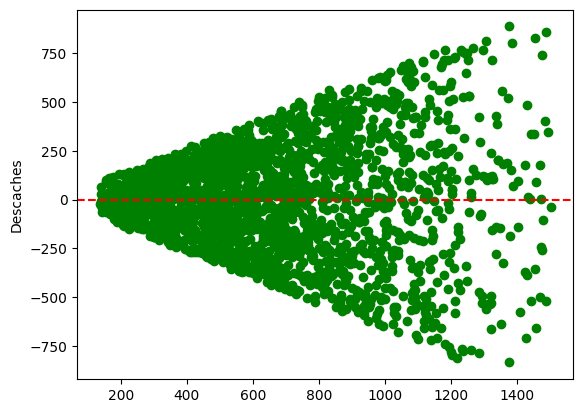

In [ ]:
descaches = y_test - y_pred
plt.scatter(y_pred, descaches, color="green")

plt.axhline(y=0, color="red", linestyle="--")
plt.ylabel("Valores predichos")
plt.ylabel("Descaches")
plt.show

<ipython-input-12-a9d00884d560>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='Economic_Impact_Million_USD', data=data, palette='Set3')


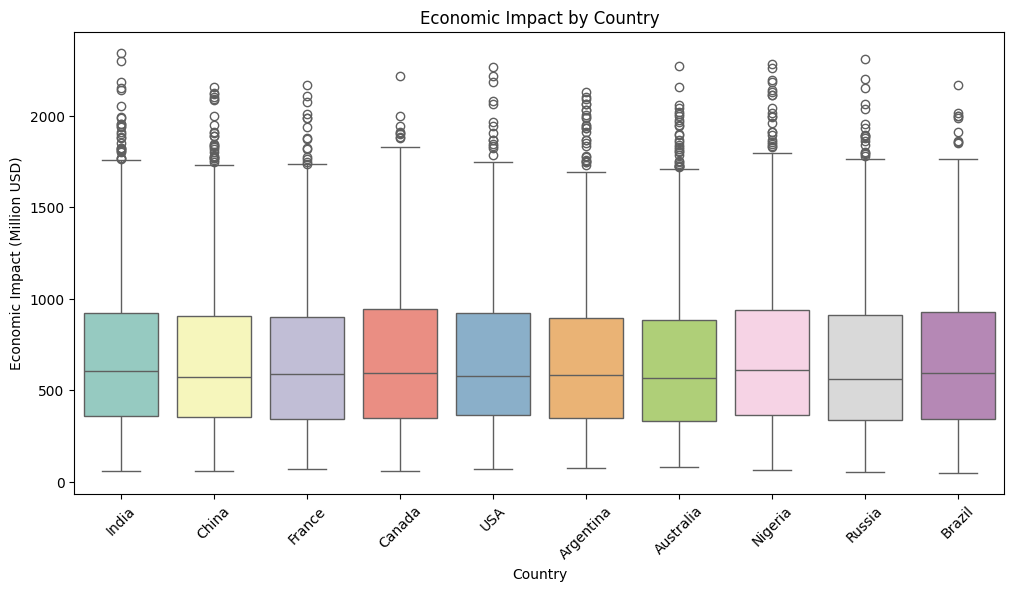

<ipython-input-12-a9d00884d560>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Economic_Impact_Million_USD', data=data, palette='Set2')


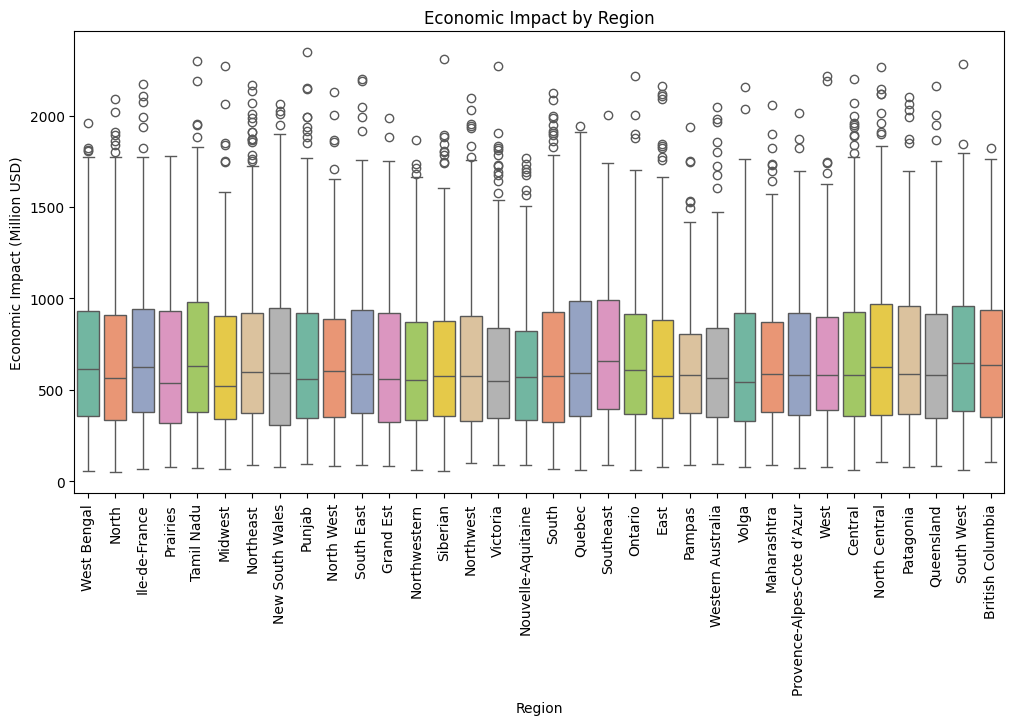

<ipython-input-12-a9d00884d560>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Crop_Type', y='Economic_Impact_Million_USD', data=data, palette='muted')


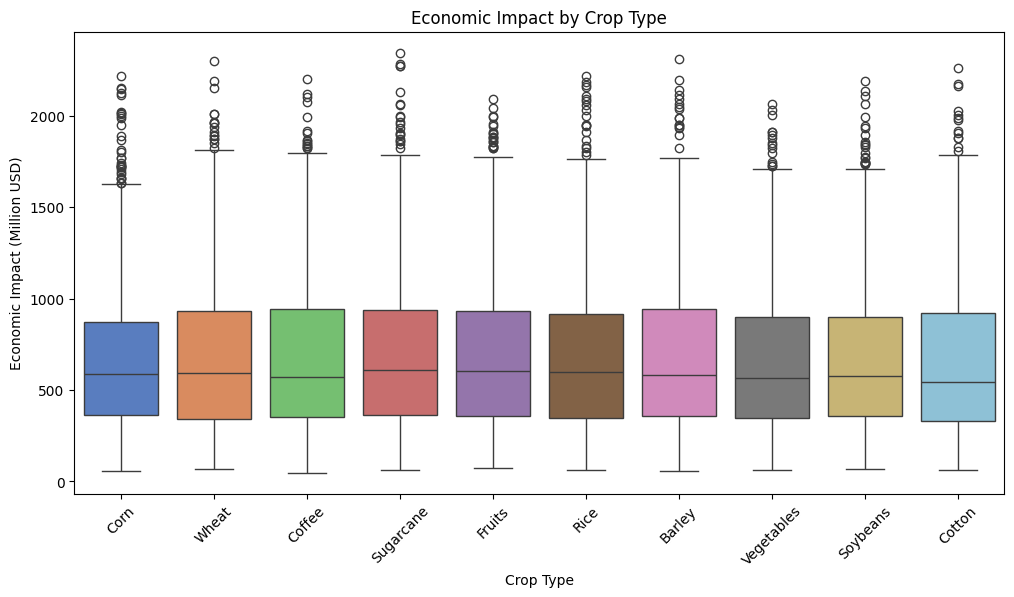

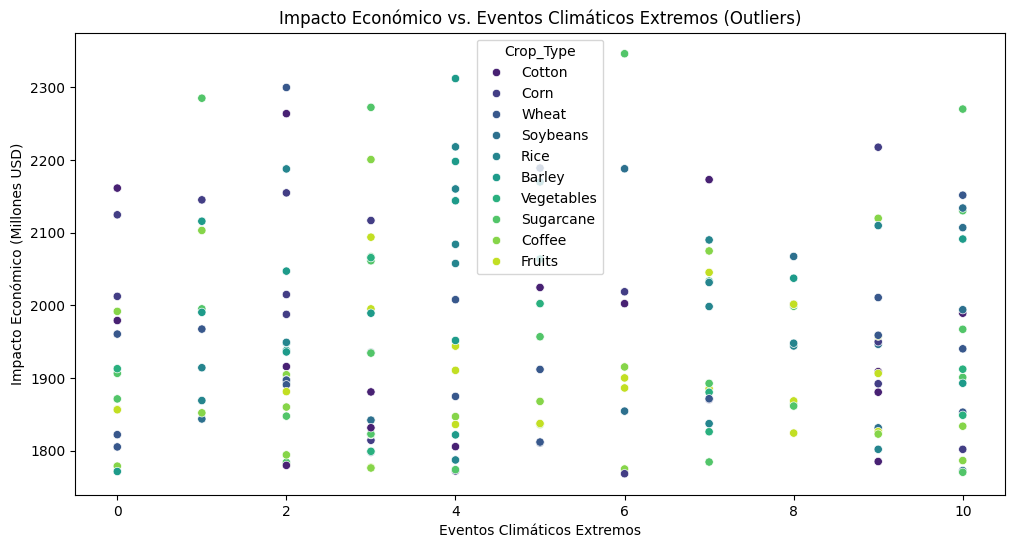

In [ ]:
# Calcular Q1, Q3 y el rango intercuartílico (IQR)
Q1 = data['Economic_Impact_Million_USD'].quantile(0.25)
Q3 = data['Economic_Impact_Million_USD'].quantile(0.75)
IQR = Q3 - Q1

# Determinar límites de los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtrar filas con valores atípicos extremos
outliers = data[(data['Economic_Impact_Million_USD'] < lower_bound) |
              (data['Economic_Impact_Million_USD'] > upper_bound)]
# Boxplot para Economic Impact por Country
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Economic_Impact_Million_USD', data=data, palette='Set3')
plt.title('Economic Impact by Country')
plt.ylabel('Economic Impact (Million USD)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()

# Boxplot para Economic Impact por Region
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Economic_Impact_Million_USD', data=data, palette='Set2')
plt.title('Economic Impact by Region')
plt.ylabel('Economic Impact (Million USD)')
plt.xlabel('Region')
plt.xticks(rotation=90)
plt.show()

# Boxplot para Economic Impact por Crop Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Crop_Type', y='Economic_Impact_Million_USD', data=data, palette='muted')
plt.title('Economic Impact by Crop Type')
plt.ylabel('Economic Impact (Million USD)')
plt.xlabel('Crop Type')
plt.xticks(rotation=45)
plt.show()

# Scatter plot de Economic Impact vs Extreme Weather Events
plt.figure(figsize=(12, 6))
sns.scatterplot(data=outliers, x='Extreme_Weather_Events', y='Economic_Impact_Million_USD', hue='Crop_Type', palette='viridis')
plt.title('Impacto Económico vs. Eventos Climáticos Extremos (Outliers)')
plt.xlabel('Eventos Climáticos Extremos')
plt.ylabel('Impacto Económico (Millones USD)')
plt.show()

In [ ]:
import pickle

# Guardar scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Guardar modelo
with open('model.pkl', 'wb') as f:
    pickle.dump(regressor, f)


In [ ]:
r2_train = r2_score(y_train, regressor.predict(X_train))
print("R² en entrenamiento:", r2_train)

# R² en datos de prueba
r2_test = r2_score(y_test, regressor.predict(X_test))
print("R² en prueba:", r2_test)

R² en entrenamiento: 0.5210872859249024
R² en prueba: 0.5522597588271317


In [ ]:
tree_regressor = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo
tree_regressor.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_tree = tree_regressor.predict(X_test)

# Evaluar el rendimiento del modelo
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Decision Tree - Mean Squared Error:", mse_tree)
print("Decision Tree - R2 Score:", r2_tree)

Decision Tree - Mean Squared Error: 165867.59649735
Decision Tree - R2 Score: 0.08040967787509401


In [ ]:
# Inicializar el modelo
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_regressor.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_rf = rf_regressor.predict(X_test)

# Evaluar el rendimiento del modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - R2 Score:", r2_rf)

Random Forest - Mean Squared Error: 85001.93715087706
Random Forest - R2 Score: 0.5287388229137034


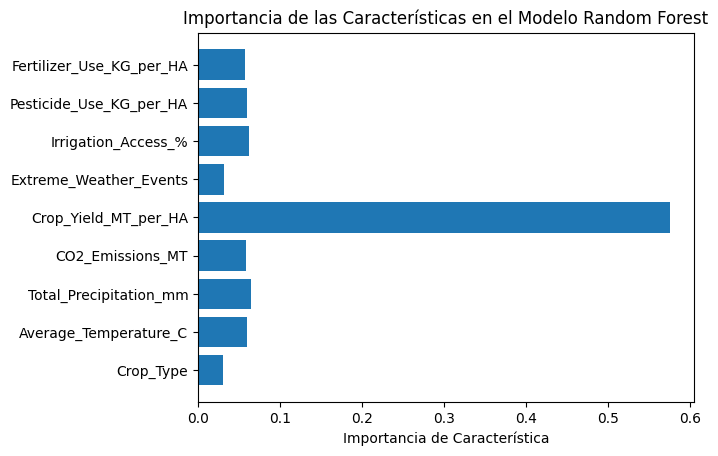

In [ ]:

# Obtener la importancia de las características
feature_importances = rf_regressor.feature_importances_

# Visualizar las importancias
plt.barh(X.columns, feature_importances)
plt.xlabel('Importancia de Característica')
plt.title('Importancia de las Características en el Modelo Random Forest')
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Definir el modelo base
rf_model = RandomForestRegressor(random_state=42)

# Definir los hiperparámetros a probar
param_dist = {
    'n_estimators': np.arange(50, 201, 50),  # Número de árboles
    'max_depth': np.arange(5, 21, 5),         # Profundidad máxima de cada árbol
    'min_samples_split': [2, 5, 10],          # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],            # Número mínimo de muestras en una hoja
    'max_features': ['sqrt', 'log2'],         # Valores válidos para max_features
}

# Configurar RandomizedSearchCV con los parámetros corregidos
random_search = RandomizedSearchCV(estimator=rf_model,
                                   param_distributions=param_dist,
                                   n_iter=100,  # Número de combinaciones aleatorias a probar
                                   cv=3,        # Número de pliegues en validación cruzada
                                   verbose=2,    # Muestra el progreso
                                   random_state=42,  # Semilla para reproducibilidad
                                   n_jobs=-1)    # Usar todos los núcleos disponibles

# Entrenar el modelo
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': array([ 5, 10, 15, 20]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 50, 100, 150, 200])},
                   random_state=42, verbose=2)

In [ ]:
# Hacer predicciones con el modelo optimizado
y_pred_best_rf = random_search.best_estimator_.predict(X_test)

# Evaluar el rendimiento del modelo optimizado
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

# Mostrar resultados
print("Optimized Random Forest - Mean Squared Error:", mse_best_rf)
print("Optimized Random Forest - R² Score:", r2_best_rf)

Optimized Random Forest - Mean Squared Error: 82420.67461287328
Optimized Random Forest - R² Score: 0.5430496593816918


In [60]:
# Evaluación con validación cruzada
rf_cv_score = cross_val_score(random_search.best_estimator_, X, y, cv=5, scoring='neg_mean_squared_error')
lr_cv_score = cross_val_score(regressor, X, y, cv=5, scoring='neg_mean_squared_error')

print("Random Forest Cross-Validation MSE:", -rf_cv_score.mean())
print("Linear Regression Cross-Validation MSE:", -lr_cv_score.mean())





Random Forest Cross-Validation MSE: 83038.38250150604
Linear Regression Cross-Validation MSE: 81333.14774940423


In [59]:
rf_model = random_search.best_estimator_  # Random Forest
lr_model = regressor                     # Linear Regression

# Error en entrenamiento para Random Forest
rf_train_pred = rf_model.predict(X)  # Predicción en datos de entrenamiento
rf_train_mse = mean_squared_error(y, rf_train_pred)

# Validación cruzada para Random Forest
rf_cv_score = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
rf_cv_mse = -rf_cv_score.mean()

# Error en entrenamiento para Regresión Lineal
lr_train_pred = lr_model.predict(X)
lr_train_mse = mean_squared_error(y, lr_train_pred)

# Validación cruzada para Regresión Lineal
lr_cv_score = cross_val_score(lr_model, X, y, cv=5, scoring='neg_mean_squared_error')
lr_cv_mse = -lr_cv_score.mean()

# Resultados
print("Random Forest:")
print(f" - MSE en entrenamiento: {rf_train_mse:.4f}")
print(f" - MSE en validación cruzada: {rf_cv_mse:.4f}")

print("\nLinear Regression:")
print(f" - MSE en entrenamiento: {lr_train_mse:.4f}")
print(f" - MSE en validación cruzada: {lr_cv_mse:.4f}")

# Verificación de ajuste
def check_model(train_mse, cv_mse, model_name):
    if train_mse > 1.5 * cv_mse:
        print(f"{model_name} -> Subajuste: El error de entrenamiento es significativamente alto.")
    elif cv_mse > 1.5 * train_mse:
        print(f"{model_name} -> Sobreajuste: El error de validación es significativamente mayor que el entrenamiento.")
    else:
        print(f"{model_name} -> Buen ajuste: El modelo generaliza bien.")

print("\nEvaluación del ajuste:")
check_model(rf_train_mse, rf_cv_mse, "Random Forest")
check_model(lr_train_mse, lr_cv_mse, "Linear Regression")

Random Forest:
 - MSE en entrenamiento: 61822.8605
 - MSE en validación cruzada: 83038.3825

Linear Regression:
 - MSE en entrenamiento: 81169.5274
 - MSE en validación cruzada: 81333.1477

Evaluación del ajuste:
Random Forest -> Buen ajuste: El modelo generaliza bien.
Linear Regression -> Buen ajuste: El modelo generaliza bien.


In [ ]:
from sklearn.ensemble import VotingRegressor

# Crear el modelo de ensamble
voting_regressor = VotingRegressor(estimators=[('rf', random_search.best_estimator_), ('lr', regressor)])

# Entrenar el modelo de ensamble
voting_regressor.fit(X_train, y_train)

# Evaluar el modelo de ensamble
y_pred_voting = voting_regressor.predict(X_test)
mse_voting = mean_squared_error(y_test, y_pred_voting)
r2_voting = r2_score(y_test, y_pred_voting)

print("Voting Regressor - Mean Squared Error:", mse_voting)
print("Voting Regressor - R² Score:", r2_voting)

Voting Regressor - Mean Squared Error: 81144.82238847463
Voting Regressor - R² Score: 0.5501231407776634


In [ ]:
# Mostrar algunas predicciones para comparar
print("Predicciones con Random Forest:", y_pred_rf[:5])
print("Predicciones con Linear Regression:", y_pred[:5])

# Evaluar el rendimiento de ambos modelos
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_lr = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred_rf)
r2_lr = r2_score(y_test, y_pred)

print("\nModelo Random Forest - MSE:", mse_rf)
print("Modelo Random Forest - R²:", r2_rf)

print("\nModelo Linear Regression - MSE:", mse_lr)
print("Modelo Linear Regression - R²:", r2_lr)

Predicciones con Random Forest: [ 195.8195 1376.9694  660.0024  480.682   410.9064]
Predicciones con Linear Regression: [ 193.10770597 1227.60851392  760.60887415  454.15850904  467.99486183]

Modelo Random Forest - MSE: 85001.93715087706
Modelo Random Forest - R²: 0.5287388229137034

Modelo Linear Regression - MSE: 80759.43805811406
Modelo Linear Regression - R²: 0.5522597588271317


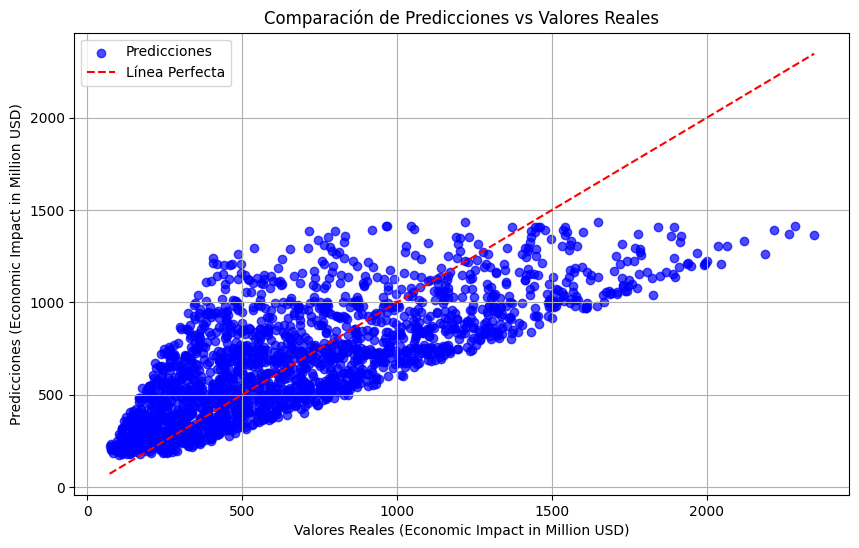

In [ ]:
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_voting, alpha=0.7, label="Predicciones", color="blue")

# Agregar la línea de identidad
min_val = min(y_test.min(), y_pred_voting.min())
max_val = max(y_test.max(), y_pred_voting.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="Línea Perfecta")

# Configuración del gráfico
plt.title("Comparación de Predicciones vs Valores Reales")
plt.xlabel("Valores Reales (Economic Impact in Million USD)")
plt.ylabel("Predicciones (Economic Impact in Million USD)")
plt.legend()
plt.grid(True)
plt.show()